### Carga de librerias necesarias para el analisis multivariante

In [1]:

#==============================================================================
# EJEMPLO DEL MÉTODO DE análisis discriminante linea
#==============================================================================

# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Se carga el dataset 
# Dry Bean Dataset 


### Este es un dataset donde se utilizaron siete tipos diferentes de frijoles secos, considerando características como forma, tamaño, tipo y estructura, acordes a la situación del mercado. Se desarrolló un sistema de visión artificial para distinguir siete variedades registradas de frijoles secos con características similares, con el fin de obtener una clasificación uniforme de las semillas. Para el modelo de clasificación, se capturaron imágenes de 13 611 granos de los siete tipos registrados de frijoles secos con una cámara de alta resolución. Las imágenes de los frijoles obtenidas mediante el sistema de visión artificial se sometieron a etapas de segmentación y extracción de características, obteniéndose un total de 16 características: 12 dimensiones y 4 formas 🧐


### Diccionario de Datos: Dry Bean Dataset

| Variable | Tipo | Descripción | Valores / Ejemplo |
| :--- | :--- | :--- | :--- |
| **Area** | Numérica (Continua) | 📏 El área de la zona del frijol y el número de píxeles dentro de sus límites. | 28395, 30279, ... |
| **Perimeter** | Numérica (Continua) | 🔄 La circunferencia del frijol, definida como la longitud de su borde. | 610.291, 631.065, ... |
| **MajorAxisLength** | Numérica (Continua) | ↔️ La distancia entre los extremos de la línea más larga que se puede trazar en un frijol. | 208.178, 212.826, ... |
| **MinorAxisLength** | Numérica (Continua) | ↕️ La línea más larga que se puede trazar en el frijol perpendicular al eje principal. | 173.888, 182.514, ... |
| **AspectRatio** | Numérica (Continua) | 📐 Define la relación entre el `MajorAxisLength` (L) y el `MinorAxisLength` (l). | 1.197, 1.166, ... |
| **Eccentricity** | Numérica (Continua) | 🌀 Excentricidad de la elipse que tiene los mismos momentos que la región del frijol. | 0.549, 0.519, ... |
| **ConvexArea** | Numérica (Continua) | 📦 Número de píxeles en el polígono convexo más pequeño que puede contener el frijol. | 28715, 30624, ... |
| **EquivalentDiameter**| Numérica (Continua) | ⭕ El diámetro de un círculo que tendría la misma área que el frijol. | 190.141, 196.346, ... |
| **Extent** | Numérica (Continua) | ⏹️ La proporción de píxeles en el área del frijol con respecto a su caja delimitadora (bounding box). | 0.763, 0.772, ... |
| **Solidity** | Numérica (Continua) | 🧱 También conocido como convexidad. La proporción de píxeles en el frijol vs. su "cáscara" convexa. | 0.988, 0.988, ... |
| **Roundness** | Numérica (Continua) | 🔵 Mide qué tan redondo es el frijol. Calculado como: $(4\pi \cdot \text{Area}) / (\text{Perimeter}^2)$. | 0.958, 0.953, ... |
| **Compactness** | Numérica (Continua) |  compactness Mide la redondez de un objeto. Calculado como: `EquivalentDiameter` / `MajorAxisLength`. | 0.913, 0.922, ... |
| **ShapeFactor1** | Numérica (Continua) | 🔲 Una medida de forma (sin fórmula específica provista). | 0.007, 0.007, ... |
| **ShapeFactor2** | Numérica (Continua) | 🔲 Una medida de forma (sin fórmula específica provista). | 0.003, 0.003, ... |
| **ShapeFactor3** | Numérica (Continua) | 🔲 Una medida de forma (sin fórmula específica provista). | 0.834, 0.851, ... |
| **ShapeFactor4** | Numérica (Continua) | 🔲 Una medida de forma (sin fórmula específica provista). | 0.998, 0.999, ... |
| **Class** | Categórica (Nominal) | 🎯 La variedad del frijol.<br>*Variable objetivo a predecir.* | Seker, Barbunya, Bombay, Cali, ... |


### Paso 1: Carga, Exploración y Limpieza de Datos

Cargamos el archivo `Dry_Bean.csv` y realizamos la inspección inicial (nulos y duplicados).

In [2]:
df = pd.read_csv('./Dry_Bean.csv') # Cargar dataset
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
print(f"Dimensiones originales (filas, columnas): {df.shape}")
print("\n--- Inspección de Tipos y Nulos (df.info()) ---")
df.info()

Dimensiones originales (filas, columnas): (13611, 17)

--- Inspección de Tipos y Nulos (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  S

In [4]:
# --- Conteo de Duplicados ---
duplicate_count = df.duplicated().sum()
print(f"\n--- Conteo de Duplicados ---")
print(f"Se encontraron {duplicate_count} filas duplicadas.")

# --- Limpieza de Duplicados ---
# Como Data Scientist, es crucial eliminar duplicados para un análisis estadístico válido.
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicados eliminados. Nuevo shape: {df.shape}")


--- Conteo de Duplicados ---
Se encontraron 68 filas duplicadas.
Duplicados eliminados. Nuevo shape: (13543, 17)


In [5]:
# --- Análisis de la Variable Objetivo 'Class' ---
print("\n--- Análisis de la Variable Objetivo (Target) 'Class' ---")
if 'Class' in df.columns:
    num_classes = df['Class'].nunique()
    print(f"Número de clases únicas (k): {num_classes}")
    print("\nDistribución de clases:")
    print(df['Class'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))
else:
    print("¡ERROR! No se encontró la columna 'Class', necesaria para LDA.")


--- Análisis de la Variable Objetivo (Target) 'Class' ---
Número de clases únicas (k): 7

Distribución de clases:
Class
DERMASON    26.18%
SIRA        19.46%
SEKER       14.97%
HOROZ       13.73%
CALI        12.04%
BARBUNYA     9.76%
BOMBAY       3.85%
Name: proportion, dtype: object


### Paso 2: Preprocesamiento de Datos para LDA

LDA es un método supervisado y tiene dos requisitos clave:
1.  **Características (X) escaladas:** LDA es sensible a la escala de las variables (como PCA), por lo que usaremos `StandardScaler`.
2.  **Variable Objetivo (y) numérica:** La variable `Class` es un objeto (texto), por lo que debemos codificarla a números (0, 1, 2...). Usaremos `LabelEncoder`.

In [6]:
# --- Separar Características (X) y Objetivo (y) ---
if 'Class' in df.columns:
    X = df.drop('Class', axis=1)
    y = df['Class']
    
    # Guardar nombres para análisis futuros
    feature_names = X.columns.tolist()
    
    print(f"Separación lista: X tiene {X.shape[1]} características y 'y' es nuestra variable objetivo.")

    # --- 3.a. Codificar 'y' (LabelEncoder) ---
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    # Guardar las clases para la leyenda del gráfico
    class_names = le.classes_
    print(f"Variable 'y' codificada en {len(class_names)} valores numéricos.")
    # print(f"Mapeo de clases: {list(zip(le.classes_, le.transform(le.classes_)))}")

    # --- 3.b. Escalar 'X' (StandardScaler) ---
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print("Características (X) estandarizadas (media 0, varianza 1).")
    
else:
    print("El análisis no puede continuar sin la columna 'Class'.")

Separación lista: X tiene 16 características y 'y' es nuestra variable objetivo.
Variable 'y' codificada en 7 valores numéricos.
Características (X) estandarizadas (media 0, varianza 1).


### Paso 3: Aplicación del Análisis Discriminante Lineal (LDA)

Ahora aplicamos LDA. El objetivo es reducir la dimensionalidad de 16 características a un nuevo espacio de componentes que *maximice la separación* entre las 7 clases.

El número máximo de componentes que LDA puede crear es $k-1$, donde $k$ es el número de clases.

* $k = 7$ (clases de frijoles)
* $n\_componentes = 7 - 1 = 6$

In [7]:
# --- Aplicación de LDA ---

# k = 7, por lo tanto n_components = 6
k = len(class_names)
n_components_lda = k - 1

print(f"Aplicando LDA. Reduciendo {X.shape[1]} características a {n_components_lda} componentes...")

# Usamos scikit-learn, que es la implementación estándar con enfoque estadístico
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)

# Ajustar (fit) y transformar (transform) los datos escalados (X) usando la info de 'y'
X_lda = lda.fit_transform(X_scaled, y_encoded)

print("Transformación LDA completada.")

Aplicando LDA. Reduciendo 16 características a 6 componentes...
Transformación LDA completada.


## Paso 4: Análisis de Resultados

Evaluemos qué tan buenos son estos nuevos 6 componentes (LD1 a LD6) para separar las clases. Lo medimos con la "Varianza de Separación Explicada".

In [8]:
# --- Varianza de Separación Explicada ---

explained_variance = lda.explained_variance_ratio_

print("\nVarianza de separación explicada por cada Componente Discriminante (LD):")
cumulative_variance = 0.0
for i, variance in enumerate(explained_variance):
    cumulative_variance += variance
    print(f"  LD{i+1}: {variance * 100:.2f}% (Acumulado: {cumulative_variance * 100:.2f}%)")

print(f"\nTotal explicado por los 2 primeros componentes (para visualización): {(explained_variance[0] + explained_variance[1]) * 100:.2f}%")
print(f"Total explicado por todos los {n_components_lda} componentes: {np.sum(explained_variance) * 100:.2f}%")


# --- 5.b. Creación del DataFrame Transformado ---
# Creemos un nuevo DataFrame con estos componentes para facilitar la visualización

lda_columns = [f'LD{i+1}' for i in range(n_components_lda)]
df_lda = pd.DataFrame(data=X_lda, columns=lda_columns)

# Añadir la variable objetivo original (no la codificada) para claridad
df_lda['Class'] = y.values 

print("\n--- Muestra del DataFrame transformado (primeros 5) ---")
print(df_lda.head())


Varianza de separación explicada por cada Componente Discriminante (LD):
  LD1: 54.34% (Acumulado: 54.34%)
  LD2: 21.43% (Acumulado: 75.76%)
  LD3: 10.68% (Acumulado: 86.45%)
  LD4: 9.06% (Acumulado: 95.51%)
  LD5: 3.00% (Acumulado: 98.51%)
  LD6: 1.49% (Acumulado: 100.00%)

Total explicado por los 2 primeros componentes (para visualización): 75.76%
Total explicado por todos los 6 componentes: 100.00%

--- Muestra del DataFrame transformado (primeros 5) ---
        LD1       LD2       LD3       LD4       LD5       LD6  Class
0  2.645296 -2.258888  2.193942 -2.691930 -1.049782 -2.389260  SEKER
1  1.330057 -1.032540  3.688068 -1.656944 -1.743289 -1.038980  SEKER
2  2.660574 -2.193462  2.386481 -2.508990 -0.775005 -2.022031  SEKER
3  1.895657 -1.822513  2.453598 -1.654647 -1.159735 -1.275973  SEKER
4  2.629363 -2.882821  2.037658 -0.661164 -3.245848  0.599688  SEKER


## Paso 5: Visualización de la Separación de Clases

Si LDA funcionó bien, deberíamos ser capaces de ver *clusters* (grupos) claros de las diferentes clases de frijoles con solo los dos primeros componentes (LD1 y LD2), que capturan el **75.76%** de la información de separación.

Generando visualización de LD1 vs LD2...


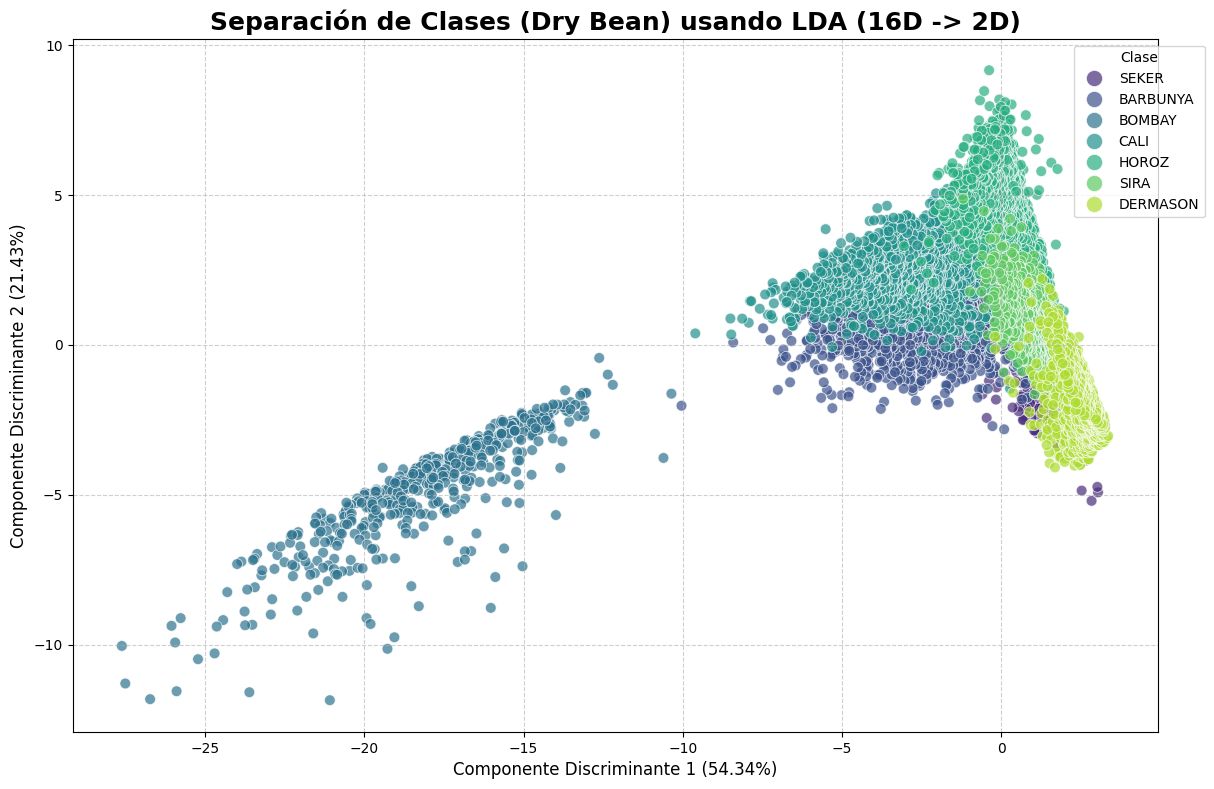

In [9]:
# --- Visualización de los 2 Primeros Componentes ---

print("Generando visualización de LD1 vs LD2...")

plt.figure(figsize=(14, 9))
sns.scatterplot(
    data=df_lda,
    x='LD1',
    y='LD2',
    hue='Class',  # Colorear por la clase original
    s=60,         # Tamaño del punto
    alpha=0.7,    # Transparencia
    palette='viridis' # Esquema de color
)

# Títulos y etiquetas
plt.title('Separación de Clases (Dry Bean) usando LDA (16D -> 2D)', fontsize=18, weight='bold')
plt.xlabel(f'Componente Discriminante 1 ({explained_variance[0] * 100:.2f}%)', fontsize=12)
plt.ylabel(f'Componente Discriminante 2 ({explained_variance[1] * 100:.2f}%)', fontsize=12)
plt.legend(title='Clase', loc='best', markerscale=1.5, bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.6)

# Guardar el gráfico (opcional)
# plot_filename = 'lda_class_separation.png'
# plt.savefig(plot_filename, bbox_inches='tight')
# print(f"Gráfico guardado en: {plot_filename}")

plt.show()

## Paso 6: Conclusión - ¿Qué utilidad tiene haber aplicado LDA?

Como Científico de Datos Senior, mi evaluación es que aplicar LDA a este dataset ha sido **altamente beneficioso** y proporciona valor inmediato en cuatro áreas clave:

### 1. Visualización y Validación de Hipótesis 📈
* **Utilidad:** Es imposible visualizar cómo 16 características separan 7 clases. El gráfico anterior comprime el 75.76% de la "información de separación" en un simple gráfico 2D.
* **Insight:** El gráfico demuestra de forma irrefutable que **las 7 clases de frijoles son linealmente muy separables**. Los *clusters* (grupos de colores) están bien definidos y tienen muy poco solapamiento. Esto nos dice que modelos lineales (como la propia LDA, Regresión Logística o SVM) tendrán un rendimiento excelente en este problema.

### 2. Reducción de Dimensionalidad Supervisada 🔬
* **Utilidad:** Hemos reducido el número de características en un 62.5% (de 16 a 6).
* **Diferencia vs. PCA:** A diferencia de PCA (que solo busca varianza), LDA encuentra las 6 dimensiones que *mejor separan las 7 clases*. El resultado de `100.00%` nos dice que estos 6 componentes capturan *toda* la información de separabilidad lineal que existía en las 16 características originales.

### 3. Ingeniería de Características (Feature Engineering) Óptima 🛠️
* **Utilidad:** Los 6 componentes (LD1 a LD6) son, por definición, las *mejores* 6 características que se pueden crear combinando linealmente las 16 originales para predecir la `Class`.
* **Resultado (Artefacto):** El `df_lda` que creamos es un nuevo dataset "optimizado", listo para ser usado en un modelo de Machine Learning.

### 4. Creación de Modelos más Eficientes y Ligeros (MLOps) 🚀
* **Utilidad:** En lugar de entrenar un modelo complejo (ej. XGBoost, Red Neuronal) en 16 características, ahora podemos entrenar un modelo mucho más simple (ej. k-NN, Regresión Logística) usando solo los 6 componentes LDA.
* **Beneficio:** Este nuevo modelo será **significativamente más rápido de entrenar**, más rápido para servir predicciones (inferencia) y menos propenso al sobreajuste (overfitting), ya que hemos mitigado la "maldición de la dimensionalidad".